In [1]:
#Setting up the environment of Apache Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,242 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,014 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main 

In [2]:
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=77472641edc99ce171c5981995cd6667a594dda12d9d9527ea2ff003e39575bf
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
#Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [4]:
#Initialize Spark
import findspark
findspark.init()
findspark.find()

'/content/spark-3.5.0-bin-hadoop3'

In [5]:
from pyspark.sql import SparkSession

In [6]:
#Starting a Spark Session
spark=SparkSession.builder.appName("Airline Dataset").config("spark.jars", "/content/graphframes-0.8.3-spark3.5-s_2.12.jar").getOrCreate()

In [7]:
#Load flight data into a DataFrame.
Dataset=spark.read.csv("/content/2009.csv", header=True, inferSchema=True)

In [8]:
print(Dataset)

DataFrame[FL_DATE: date, OP_CARRIER: string, OP_CARRIER_FL_NUM: int, ORIGIN: string, DEST: string, CRS_DEP_TIME: int, DEP_TIME: double, DEP_DELAY: double, TAXI_OUT: double, WHEELS_OFF: double, WHEELS_ON: double, TAXI_IN: double, CRS_ARR_TIME: int, ARR_TIME: double, ARR_DELAY: double, CANCELLED: double, CANCELLATION_CODE: string, DIVERTED: double, CRS_ELAPSED_TIME: double, ACTUAL_ELAPSED_TIME: double, AIR_TIME: double, DISTANCE: double, CARRIER_DELAY: double, WEATHER_DELAY: double, NAS_DELAY: double, SECURITY_DELAY: double, LATE_AIRCRAFT_DELAY: double, Unnamed: 27: string]


In [9]:
#View of our Dataset
Dataset.show()

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|   FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|

In [11]:
# Extracting vertices
vertices = Dataset.selectExpr("ORIGIN as id").distinct()

# Extracting edges
edges = Dataset.selectExpr("ORIGIN as src", "DEST as dst")

In [12]:
vertices.show()

+---+
| id|
+---+
|BGM|
|PSE|
|MSY|
|GEG|
|BUR|
|SNA|
|GRB|
|GTF|
|IDA|
|GRR|
|EUG|
|PSG|
|GSO|
|PVD|
|MYR|
|OAK|
|MSN|
|COD|
|BTM|
|FAR|
+---+
only showing top 20 rows



In [14]:
edges.show()

+---+---+
|src|dst|
+---+---+
|DCA|EWR|
|EWR|IAD|
|EWR|DCA|
|DCA|EWR|
|IAD|EWR|
|ATL|EWR|
|CLE|ATL|
|DCA|EWR|
|EWR|DCA|
|EWR|DCA|
|DCA|EWR|
|EWR|DCA|
|CLE|DCA|
|DCA|EWR|
|ORD|EWR|
|EWR|ORD|
|ORD|EWR|
|EWR|ORD|
|ORD|EWR|
|EWR|ORD|
+---+---+
only showing top 20 rows



In [15]:
!pip install graphframes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00


In [16]:
from graphframes import GraphFrame

In [12]:
from pyspark.sql.functions import col

In [17]:
#Create a Graph
g=GraphFrame(vertices,edges)

/content/spark-3.5.0-bin-hadoop3/python/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [18]:
g.vertices.show()

+---+
| id|
+---+
|BGM|
|PSE|
|MSY|
|GEG|
|BUR|
|SNA|
|GRB|
|GTF|
|IDA|
|GRR|
|EUG|
|PSG|
|GSO|
|PVD|
|MYR|
|OAK|
|MSN|
|COD|
|BTM|
|FAR|
+---+
only showing top 20 rows



In [19]:
g.edges.show()

+---+---+
|src|dst|
+---+---+
|DCA|EWR|
|EWR|IAD|
|EWR|DCA|
|DCA|EWR|
|IAD|EWR|
|ATL|EWR|
|CLE|ATL|
|DCA|EWR|
|EWR|DCA|
|EWR|DCA|
|DCA|EWR|
|EWR|DCA|
|CLE|DCA|
|DCA|EWR|
|ORD|EWR|
|EWR|ORD|
|ORD|EWR|
|EWR|ORD|
|ORD|EWR|
|EWR|ORD|
+---+---+
only showing top 20 rows



In [20]:
#Run Pagerank Algorithm
pagerank_results=g.pageRank(resetProbability=0.15, maxIter=10)

/content/spark-3.5.0-bin-hadoop3/python/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [23]:
#Viewing the results
popular_airports = pagerank_results.vertices.orderBy("pagerank", ascending=False)
popular_airports.show()


+---+------------------+
| id|          pagerank|
+---+------------------+
|ATL|17.226552723568076|
|ORD|12.448190729939112|
|DFW|10.804729740340548|
|DEN|  9.30961200796809|
|LAX| 7.319990474248356|
|PHX| 6.795333619212877|
|SLC| 6.673970950591279|
|IAH| 6.530720052315698|
|DTW| 6.260272037606507|
|SFO| 5.473567147131535|
|LAS|5.3154514073815475|
|MSP| 5.242469371606393|
|SEA| 4.367447487322977|
|MCO| 4.345850780863327|
|EWR| 4.249605309817999|
|CLT| 4.094247666831362|
|JFK|3.9548187590727126|
|BOS|3.5642224496783492|
|LGA|3.5415497948298698|
|BWI|3.2996033222250234|
+---+------------------+
only showing top 20 rows



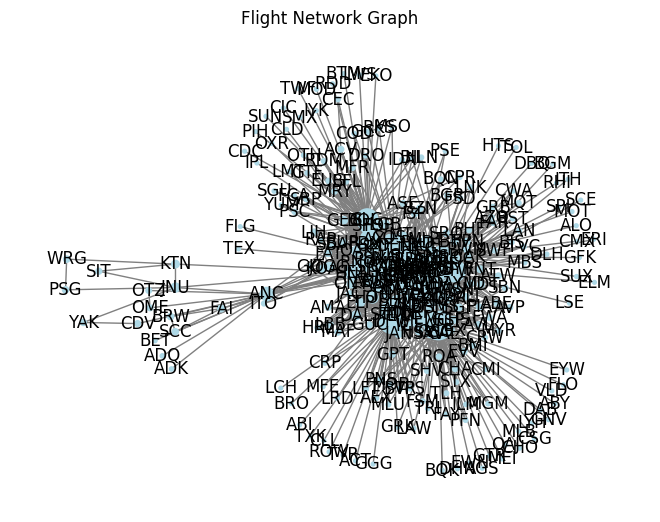

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert your PySpark DataFrame to a Pandas DataFrame
pandas_df = Dataset.select("ORIGIN", "DEST").toPandas()

# Creating the graph
G = nx.from_pandas_edgelist(pandas_df, 'ORIGIN', 'DEST')

# Calculate PageRank
pageranks = nx.pagerank(G)

# Use PageRank values for node sizes
sizes = [pageranks[node] * 10000 for node in G.nodes()]

# Drawing the network
nx.draw(G, with_labels=True, node_size=sizes, node_color='lightblue', edge_color='gray')
plt.title("Flight Network Graph")
plt.show()
